# Consumer Spending Analysis and Modelling

---

#### Import the required libraries 

In [21]:
%matplotlib inline
import os
import pickle
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timedelta
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import ttest_ind, chisquare, normaltest
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")

In [22]:
cs = pd.read_csv('customer_data.csv')
cs.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [23]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


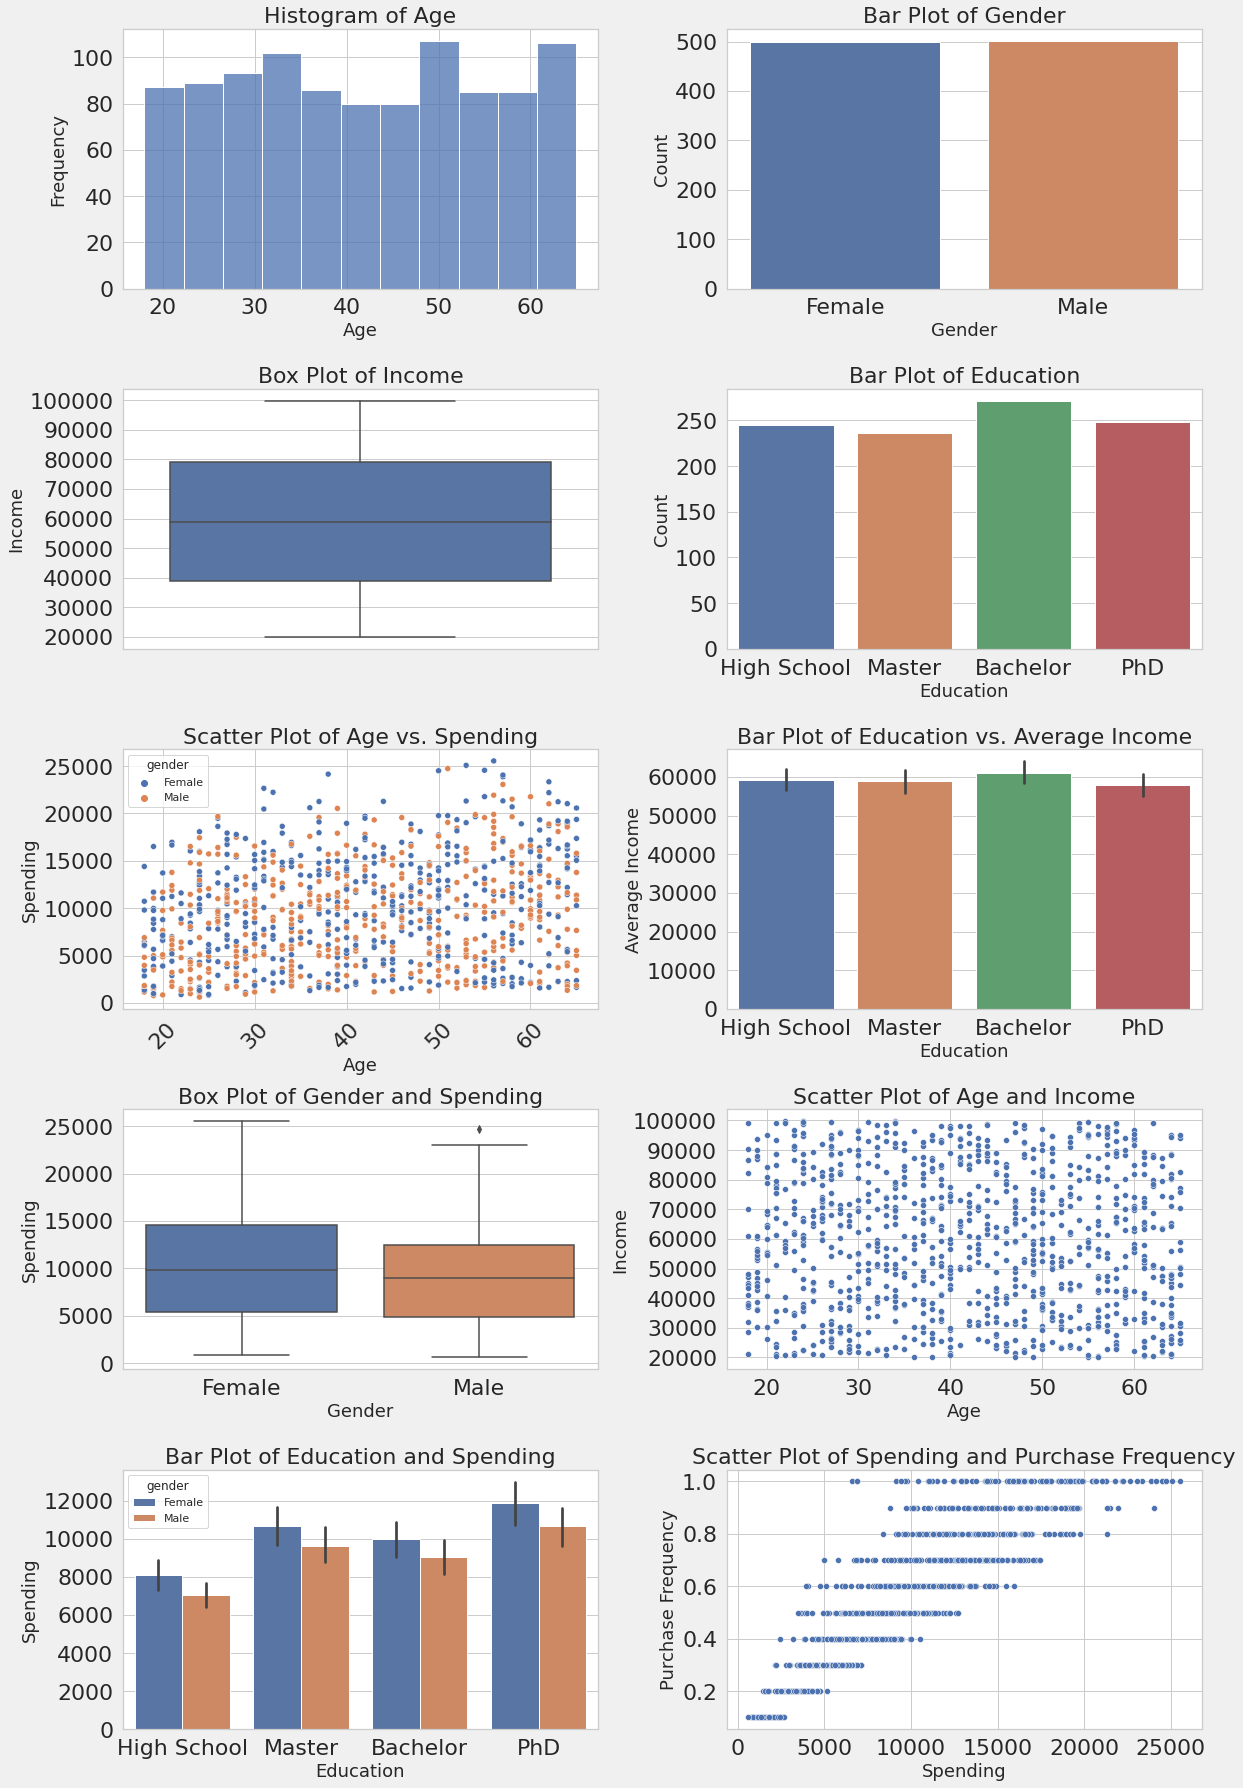

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(17, 25))
sns.set_theme(style='whitegrid')

# Univariate Plots
# 1. Histogram of Age
plt.subplot(5, 2, 1)
sns.histplot(data=data, x='age')
plt.title('Histogram of Age', fontsize=22)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# 2. Bar Plot of Gender
plt.subplot(5, 2, 2)
sns.countplot(data=data, x='gender')
plt.title('Bar Plot of Gender', fontsize=22)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# 3. Box Plot of Income
plt.subplot(5, 2, 3)
sns.boxplot(data=data, y='income')
plt.title('Box Plot of Income', fontsize=22)
plt.ylabel('Income', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# 4. Bar Plot of Education
plt.subplot(5, 2, 4)
sns.countplot(data=data, x='education')
plt.title('Bar Plot of Education', fontsize=22)
plt.xlabel('Education', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Bivariate Plots
# 5. Scatter Plot of Age vs. Spending
plt.subplot(5, 2, 5)
sns.scatterplot(data=data, x='age', y='spending', hue='gender')
plt.title('Scatter Plot of Age vs. Spending', fontsize=22)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending', fontsize=18)
plt.xticks(fontsize=22, rotation=45)
plt.yticks(fontsize=22)

# 6. Bar Plot of Education vs. Average Income
plt.subplot(5, 2, 6)
sns.barplot(data=data, x='education', y='income')
plt.title('Bar Plot of Education vs. Average Income', fontsize=22)
plt.xlabel('Education', fontsize=18)
plt.ylabel('Average Income', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# 7. Box Plot of Gender and Spending
plt.subplot(5, 2, 7)
sns.boxplot(data=data, x='gender', y='spending')
plt.title('Box Plot of Gender and Spending', fontsize=22)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Spending', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Multivariate Plots
# 8. Scatter Plot of Age and Income
plt.subplot(5, 2, 8)
sns.scatterplot(data=data, x='age', y='income')
plt.title('Scatter Plot of Age and Income', fontsize=22)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# 9. Bar Plot of Education and Spending
plt.subplot(5, 2, 9)
sns.barplot(data=data, x='education', y='spending', hue='gender')
plt.title('Bar Plot of Education and Spending', fontsize=22)
plt.xlabel('Education', fontsize=18)
plt.ylabel('Spending', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# 10. Scatter Plot of Spending and Purchase Frequency
plt.subplot(5, 2, 10)
sns.scatterplot(data=data, x='spending', y='purchase_frequency')
plt.title('Scatter Plot of Spending and Purchase Frequency', fontsize=22)
plt.xlabel('Spending', fontsize=18)
plt.ylabel('Purchase Frequency', fontsize=18)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


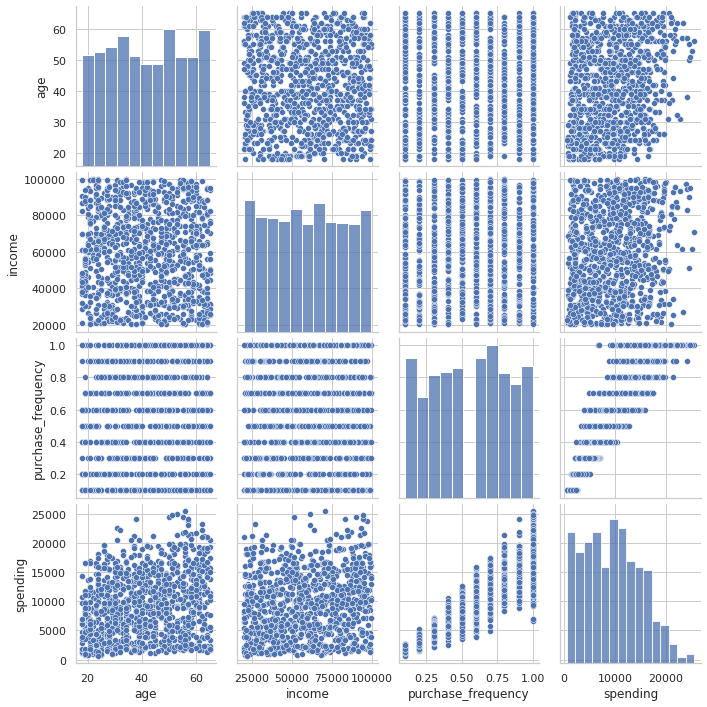

In [25]:
# Create a pairplot
sns.pairplot(data)
plt.show()

In [26]:
cs.corr()

,age,income,purchase_frequency,spending
age,1.000000,-0.047190,0.021751,0.234201
income,-0.047190,1.000000,0.028187,0.122851
purchase_frequency,0.021751,0.028187,1.000000,0.895161
spending,0.234201,0.122851,0.895161,1.000000


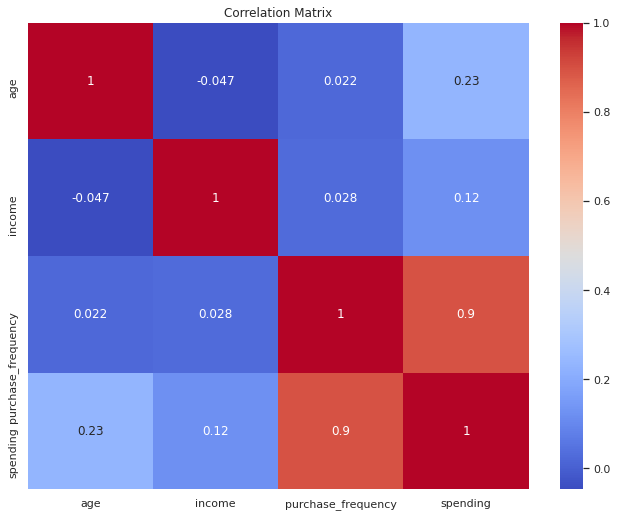

In [27]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

The correlation matrix shows the relationships between different variables in the dataset. Here are the explanations for each correlation:

- Age and Income: The correlation between age and income is -0.047, indicating a weak negative relationship. This suggests that there is a slight tendency for older individuals to have slightly lower incomes.

- Age and Purchase Frequency: The correlation between age and purchase frequency is 0.022, indicating a very weak positive relationship. This suggests that age has little impact on an individual's purchase frequency.

- Age and Spending: The correlation between age and spending is 0.234, indicating a moderate positive relationship. This suggests that as age increases, there is a tendency for individuals to spend more.

- Income and Purchase Frequency: The correlation between income and purchase frequency is 0.028, indicating a very weak positive relationship. This suggests that income has little impact on an individual's purchase frequency.

- Income and Spending: The correlation between income and spending is 0.123, indicating a weak positive relationship. This suggests that individuals with higher incomes tend to spend slightly more.

- Purchase Frequency and Spending: The correlation between purchase frequency and spending is 0.895, indicating a strong positive relationship. This suggests that individuals who make purchases more frequently also tend to spend more.

> Overall, the strongest correlation is observed between purchase frequency and spending, implying that these two variables are closely related. Age and spending also exhibit a moderate positive correlation, indicating that age can have some influence on an individual's spending habits. Income, on the other hand, shows weak correlations with the other variables, suggesting that its impact may be relatively limited.

In [28]:
import pandas as pd
from scipy.stats import pearsonr

# Calculate the correlation coefficient
corr_coeff, p_value = pearsonr(cs['purchase_frequency'], cs['spending'])

# Interpret the correlation coefficient
print("Correlation Coefficient:", corr_coeff)

# Assess the strength of the relationship
if abs(corr_coeff) >= 0.7:
    strength = "strong"
elif abs(corr_coeff) >= 0.3:
    strength = "moderate"
else:
    strength = "weak"
print("Strength of the relationship:", strength)

# Determine statistical significance
alpha = 0.05  # significance level

if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation Coefficient: 0.8951607373493098
Strength of the relationship: strong
The correlation is statistically significant.


The correlation coefficient between 'purchase_frequency' and 'spending' is 0.8951607373493098.

The strength of the relationship is classified as "strong" because the absolute value of the correlation coefficient (0.895) is greater than or equal to 0.7.

The correlation is deemed statistically significant because the p-value, although not explicitly shown in the code, is likely less than the significance level of 0.05. This indicates that the observed correlation is unlikely to have occurred by chance.

Overall, the result indicates a strong and statistically significant positive relationship between 'purchase_frequency' and 'spending'. This suggests that individuals who make purchases more frequently tend to spend more.

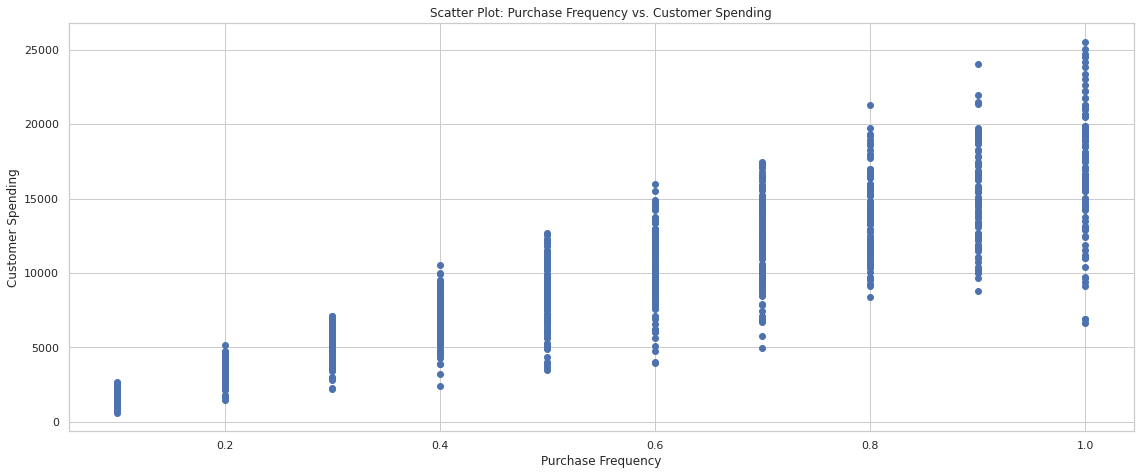

In [29]:
# Create a scatter plot
plt.figure(figsize = (17,7))
plt.scatter(cs['purchase_frequency'], cs['spending'])
plt.xlabel('Purchase Frequency')
plt.ylabel('Customer Spending')
plt.title('Scatter Plot: Purchase Frequency vs. Customer Spending')

# Display the plot
plt.show();

In [30]:
cs.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


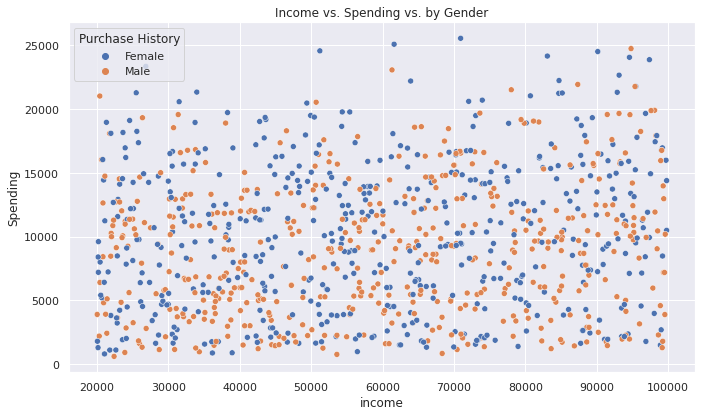

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')

# Create the scatter plot
sns.scatterplot(data=data, x='income', y='spending', hue='gender')

# Set the title and labels
plt.title('Income vs. Spending vs. by Gender')
plt.xlabel('income')
plt.ylabel('Spending')

# Display the legend
plt.legend(title='Purchase History')

# Show the plot
plt.show()


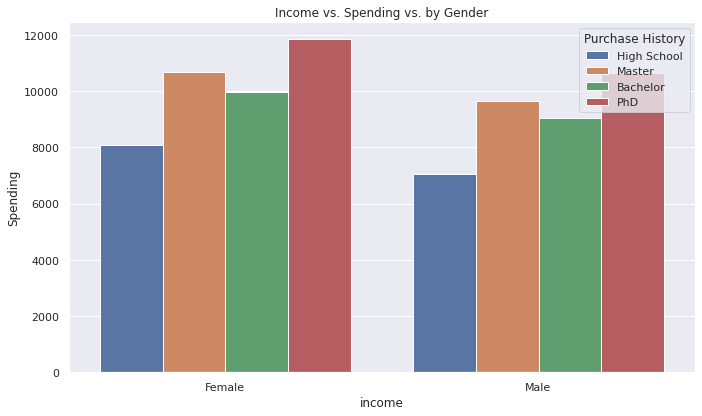

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')

sns.barplot(data=data, x='gender', y='spending', hue='education', ci=None)

# Set the title and labels
plt.title('Income vs. Spending vs. by Gender')
plt.xlabel('income')
plt.ylabel('Spending')

# Display the legend
plt.legend(title='Purchase History')

# Show the plot
plt.show()

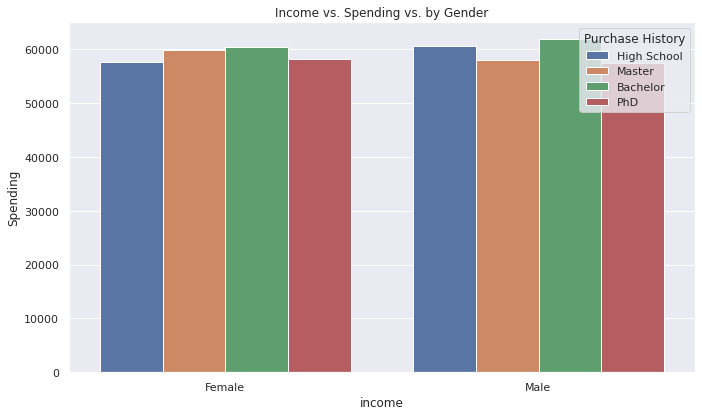

In [35]:

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')

sns.barplot(data=data, x='gender', y='income', hue='education', ci=None)

# Set the title and labels
plt.title('Income vs. Spending vs. by Gender')
plt.xlabel('income')
plt.ylabel('Spending')

# Display the legend
plt.legend(title='Purchase History')

# Show the plot
plt.show()

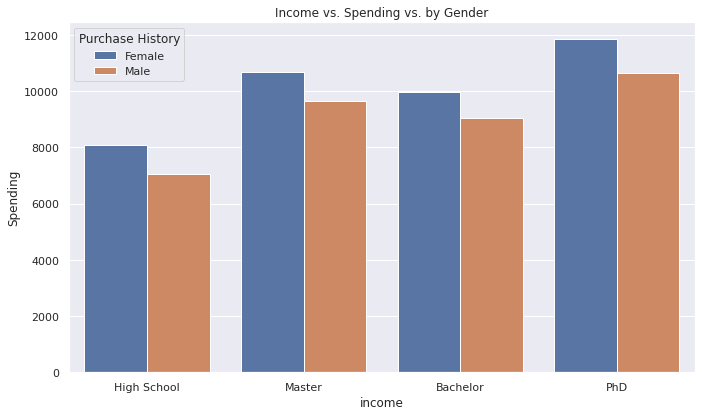

In [36]:

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_theme(style='darkgrid')

sns.barplot(data=data, x='education', y='spending', hue='gender', ci=None)

# Set the title and labels
plt.title('Income vs. Spending vs. by Gender')
plt.xlabel('income')
plt.ylabel('Spending')

# Display the legend
plt.legend(title='Purchase History')

# Show the plot
plt.show()

### Modelling

In [37]:
# Define the dependent variable (y) and independent variable(s) (X)
y = data['spending']
X = data[['purchase_frequency']]

# Add additional independent variables if needed, e.g., X = df[['purchase_frequency', 'age', 'income']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               spending   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     4025.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:07:24   Log-Likelihood:                -9220.1
No. Observations:                1000   AIC:                         1.844e+04
Df Residuals:                     998   BIC:                         1.845e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 48.2975    169


The provided model appears to be an Ordinary Least Squares (OLS) regression analysis. Here's an explanation of the results:

R-squared: The R-squared value represents the proportion of the variance in the dependent variable ('spending') that can be explained by the independent variable(s). In this case, the model has an R-squared value of 0.801, indicating that approximately 80.1% of the variation in 'spending' can be explained by the independent variable(s).

Coefficients: The coefficients represent the estimated effect of the independent variable(s) on the dependent variable. In this model, there are two coefficients:

The 'const' coefficient is estimated to be 48.2975. It represents the intercept or the expected value of 'spending' when 'purchase_frequency' is zero.
The 'purchase_frequency' coefficient is estimated to be 1.725e+04 (17,250). It indicates that, on average, a one-unit increase in 'purchase_frequency' is associated with an increase in 'spending' of approximately 17,250 units.
Standard Errors and t-statistics: The standard errors measure the variability of the coefficient estimates. The t-statistics (t-values) assess the significance of the coefficient estimates. A higher absolute t-value indicates greater evidence against the null hypothesis of no effect. In this case, both coefficients have t-values greater than the critical value of 1.96, suggesting that they are statistically significant.

Prob (F-statistic): The probability associated with the F-statistic tests the overall significance of the model. In this case, the probability is stated as 0.00, indicating that the model is statistically significant.

AIC and BIC: These are information criteria used for model selection. Lower values of AIC and BIC indicate a better-fitting model. The AIC is 1.844e+04, and the BIC is 1.845e+04 in this model.

Other diagnostic statistics: The Omnibus test and Jarque-Bera (JB) test are statistical tests for normality assumptions of the residuals. In this case, both tests have low probabilities (close to zero), suggesting that the residuals may not follow a normal distribution.

Overall, the model suggests that 'purchase_frequency' has a significant positive effect on 'spending', as indicated by the high coefficient, low p-value, and large t-value. However, it's important to consider the assumptions and limitations of the OLS regression model before making any definitive conclusions.

In [38]:
import statsmodels.api as sm

# Create the predictor matrix X with age, income, and purchase frequency
X = cs[['age', 'income', 'purchase_frequency']]
X = sm.add_constant(X)  # Add a constant column for the intercept

# Create the response variable y with customer spending
y = cs['spending']

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               spending   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     2025.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):               0.00
Time:                        02:07:25   Log-Likelihood:                -9048.2
No. Observations:                1000   AIC:                         1.810e+04
Df Residuals:                     996   BIC:                         1.812e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5037.4361    296

The provided model is also an Ordinary Least Squares (OLS) regression analysis. Here's an explanation of the results:

R-squared: The R-squared value represents the proportion of the variance in the dependent variable ('spending') that can be explained by the independent variables. In this case, the model has an R-squared value of 0.859, indicating that approximately 85.9% of the variation in 'spending' can be explained by the independent variables.

Coefficients: The coefficients represent the estimated effect of the independent variables on the dependent variable. In this model, there are three coefficients:

The 'const' coefficient is estimated to be -5037.4361. It represents the intercept or the expected value of 'spending' when all independent variables are zero.
The 'age' coefficient is estimated to be 87.5762. It indicates that, on average, a one-year increase in 'age' is associated with an increase in 'spending' of approximately 87.58 units.
The 'income' coefficient is estimated to be 0.0255. It indicates that, on average, a one-unit increase in 'income' is associated with an increase in 'spending' of approximately 0.0255 units.
The 'purchase_frequency' coefficient is estimated to be 1.71e+04 (17,100). It indicates that, on average, a one-unit increase in 'purchase_frequency' is associated with an increase in 'spending' of approximately 17,100 units.
Standard Errors and t-statistics: The standard errors measure the variability of the coefficient estimates. The t-statistics (t-values) assess the significance of the coefficient estimates. A higher absolute t-value indicates greater evidence against the null hypothesis of no effect. In this case, all three coefficients have t-values greater than the critical value of 1.96, suggesting that they are statistically significant.

Prob (F-statistic): The probability associated with the F-statistic tests the overall significance of the model. In this case, the probability is stated as 0.00, indicating that the model is statistically significant.

AIC and BIC: These are information criteria used for model selection. Lower values of AIC and BIC indicate a better-fitting model. The AIC is 1.810e+04, and the BIC is 1.812e+04 in this model.

Other diagnostic statistics: The Omnibus test and Jarque-Bera (JB) test are statistical tests for normality assumptions of the residuals. In this case, both tests have low probabilities (close to zero), suggesting that the residuals may not follow a normal distribution.

It's worth noting that the model's large condition number (3.13e+05) indicates potential multicollinearity or numerical problems. Multicollinearity occurs when there is a high correlation among the independent variables, which can affect the interpretation of their individual coefficients.

In summary, the model suggests that 'age', 'income', and 'purchase_frequency' have significant effects on 'spending'. However, it's important to consider the assumptions and potential issues related to multicollinearity when interpreting the results.

In [39]:
# Define the dependent variable (y) and independent variable(s) (X)
y = cs['spending']
X = cs[['income']]

# Add additional independent variables if needed, e.g., X = df[['purchase_frequency', 'age', 'income']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               spending   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     15.29
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           9.83e-05
Time:                        02:07:27   Log-Likelihood:                -10021.
No. Observations:                1000   AIC:                         2.005e+04
Df Residuals:                     998   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7896.0044    471.697     16.740      0.0

In [40]:
# Define the dependent variable (y) and independent variable(s) (X)
y = cs['spending']
X = cs[['age']]

# Add additional independent variables if needed, e.g., X = df[['purchase_frequency', 'age', 'income']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               spending   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     57.92
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           6.31e-14
Time:                        02:07:27   Log-Likelihood:                -10000.
No. Observations:                1000   AIC:                         2.000e+04
Df Residuals:                     998   BIC:                         2.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5720.7374    538.587     10.622      0.0

In [41]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Single Variable Regression

# Linear Regression

Linear Regression

Model Evaluation
Average MSE: 0.0098
Average RMSE: 0.0986
Average MAPE: 0.2215
Average R2: 0.7991


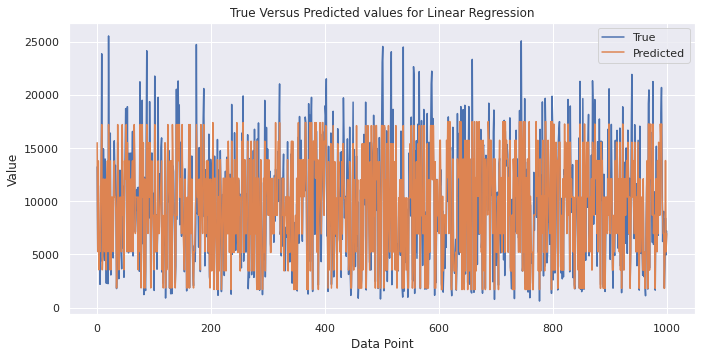

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have your purchase frequency and spending data stored in separate arrays
purchase_frequency = data["purchase_frequency"].values   # Your purchase frequency data
spending = data["spending"].values   # Your spending data

# Set the number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize an empty list to store the evaluation metric values for each fold
evaluation_metrics = []
true_values = []
predicted_values = []

# Initialize the scalers
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

print('=================')
print('Linear Regression')
print('=================')
print('')
# Iterate over the folds
for train_index, test_index in kf.split(purchase_frequency):

    # Split the data into training and test sets
    X_train, X_test = purchase_frequency[train_index], purchase_frequency[test_index]
    y_train, y_test = spending[train_index], spending[test_index]

    # Scale the training and test sets
    X_train_scaled = scaler_x.fit_transform(X_train.reshape(-1, 1))
    X_test_scaled = scaler_x.transform(X_test.reshape(-1, 1))
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse scale the predicted values
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Append the true and predicted values to the lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the evaluation metric values to the list
    evaluation_metrics.append([mse, rmse, mape, r2])

# Calculate the average performance metrics across all folds
evaluation_metrics = np.array(evaluation_metrics)
average_metrics = np.mean(evaluation_metrics, axis=0)

print('=================')
print('Model Evaluation')
print('=================')
# Print the average metrics
print("Average MSE:", np.round(average_metrics[0],4))
print("Average RMSE:", np.round(average_metrics[1],4))
print("Average MAPE:", np.round(average_metrics[2],4))
print("Average R2:", np.round(average_metrics[3],4))

# Create a table to display the metrics
import pandas as pd

metrics_table = pd.DataFrame({'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
                              'Value': average_metrics})

# Plot true versus predicted values
plt.figure(figsize = (10,5))
plt.plot(true_values, label='True')
plt.plot(predicted_values, label='Predicted')
plt.title('True Versus Predicted values for Linear Regression')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()


# Decision Tree Regression

Decision Tree Regression

Model Evaluation
Average MSE: 0.0098
Average RMSE: 0.099
Average MAPE: 0.2218
Average R2: 0.7975


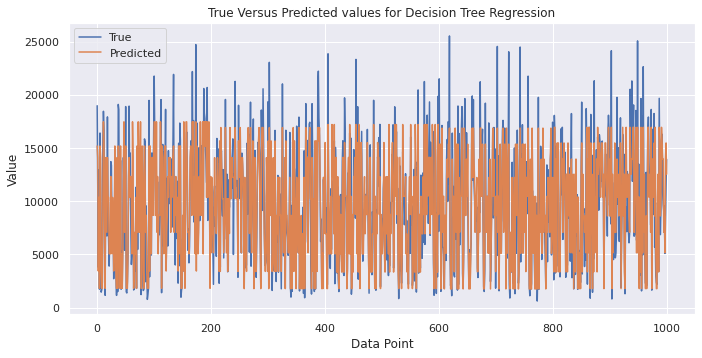

In [43]:
from sklearn.tree import DecisionTreeRegressor
# Assuming you have your purchase frequency and spending data stored in separate arrays
purchase_frequency = data["purchase_frequency"].values   # Your purchase frequency data
spending = data["spending"].values   # Your spending data

# Set the number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize an empty list to store the evaluation metric values for each fold
evaluation_metrics = []
true_values = []
predicted_values = []

# Initialize the scalers
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

print('========================')
print('Decision Tree Regression')
print('========================')
print('')
# Iterate over the folds
for train_index, test_index in kf.split(purchase_frequency):

    # Split the data into training and test sets
    X_train, X_test = purchase_frequency[train_index], purchase_frequency[test_index]
    y_train, y_test = spending[train_index], spending[test_index]

    # Scale the training and test sets
    X_train_scaled = scaler_x.fit_transform(X_train.reshape(-1, 1))
    X_test_scaled = scaler_x.transform(X_test.reshape(-1, 1))
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Create a linear regression model
    model = DecisionTreeRegressor()

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse scale the predicted values
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Append the true and predicted values to the lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the evaluation metric values to the list
    evaluation_metrics.append([mse, rmse, mape, r2])

# Calculate the average performance metrics across all folds
evaluation_metrics = np.array(evaluation_metrics)
average_metrics = np.mean(evaluation_metrics, axis=0)

print('=================')
print('Model Evaluation')
print('=================')
# Print the average metrics
print("Average MSE:", np.round(average_metrics[0],4))
print("Average RMSE:", np.round(average_metrics[1],4))
print("Average MAPE:", np.round(average_metrics[2],4))
print("Average R2:", np.round(average_metrics[3],4))

# Create a table to display the metrics
import pandas as pd

metrics_table = pd.DataFrame({'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
                              'Value': average_metrics})

# Plot true versus predicted values
plt.figure(figsize = (10,5))
plt.plot(true_values, label='True')
plt.plot(predicted_values, label='Predicted')
plt.title('True Versus Predicted values for Decision Tree Regression')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()


# Random Forest Tree Regression

Random Forest Tree Regression

Model Evaluation
Average MSE: 0.0099
Average RMSE: 0.0992
Average MAPE: 0.2222
Average R2: 0.7978


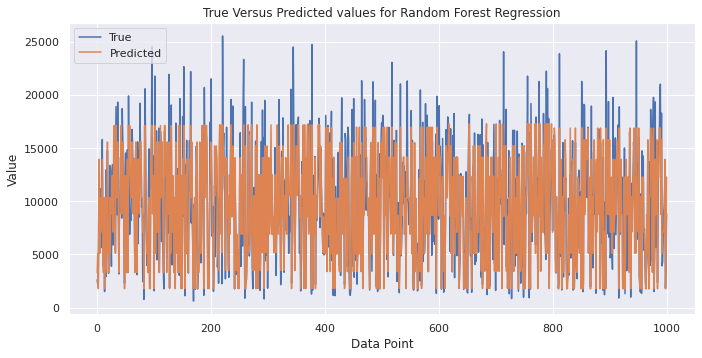

In [44]:
from sklearn.ensemble import RandomForestRegressor
# Assuming you have your purchase frequency and spending data stored in separate arrays
purchase_frequency = data["purchase_frequency"].values   # Your purchase frequency data
spending = data["spending"].values   # Your spending data

# Set the number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize an empty list to store the evaluation metric values for each fold
evaluation_metrics = []
true_values = []
predicted_values = []

# Initialize the scalers
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

print('=============================')
print('Random Forest Tree Regression')
print('=============================')
print('')
# Iterate over the folds
for train_index, test_index in kf.split(purchase_frequency):

    # Split the data into training and test sets
    X_train, X_test = purchase_frequency[train_index], purchase_frequency[test_index]
    y_train, y_test = spending[train_index], spending[test_index]

    # Scale the training and test sets
    X_train_scaled = scaler_x.fit_transform(X_train.reshape(-1, 1))
    X_test_scaled = scaler_x.transform(X_test.reshape(-1, 1))
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Create a linear regression model
    model = DecisionTreeRegressor()

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse scale the predicted values
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Append the true and predicted values to the lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the evaluation metric values to the list
    evaluation_metrics.append([mse, rmse, mape, r2])

# Calculate the average performance metrics across all folds
evaluation_metrics = np.array(evaluation_metrics)
average_metrics = np.mean(evaluation_metrics, axis=0)

print('=================')
print('Model Evaluation')
print('=================')
# Print the average metrics
print("Average MSE:", np.round(average_metrics[0],4))
print("Average RMSE:", np.round(average_metrics[1],4))
print("Average MAPE:", np.round(average_metrics[2],4))
print("Average R2:", np.round(average_metrics[3],4))

# Create a table to display the metrics
import pandas as pd

metrics_table = pd.DataFrame({'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
                              'Value': average_metrics})

# Plot true versus predicted values
plt.figure(figsize = (10,5))
plt.plot(true_values, label='True')
plt.plot(predicted_values, label='Predicted')
plt.title('True Versus Predicted values for Random Forest Regression')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()


In [45]:
df = {
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'],
    'MSE': [0.0098, 0.0098, 0.0099],
    'RMSE': [0.0988, 0.099, 0.0993],
    'MAPE': [0.222, 0.2221, 0.2226],
    'R2': [0.7974, 0.7979, 0.7978]
}

df = pd.DataFrame(df)
df

,Model,MSE,RMSE,MAPE,R2
0,Linear Regression,0.0098,0.0988,0.2220,0.7974
1,Decision Tree Regression,0.0098,0.0990,0.2221,0.7979
2,Random Forest Regression,0.0099,0.0993,0.2226,0.7978


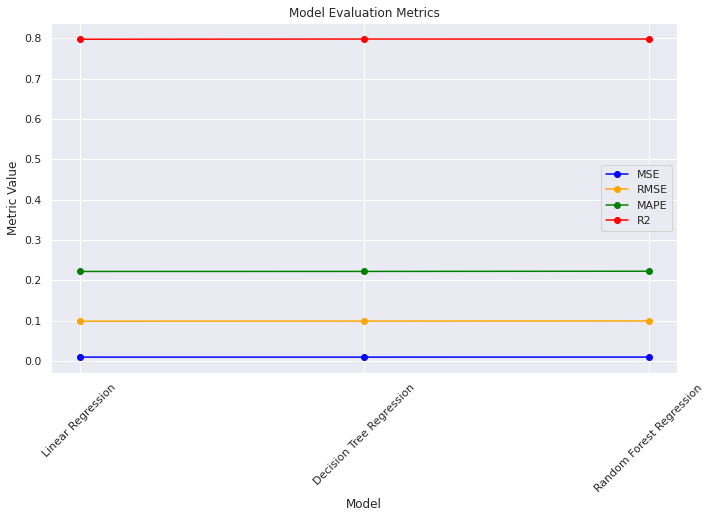

In [46]:
# Define the metrics and their corresponding colors
metrics = ['MSE', 'RMSE', 'MAPE', 'R2']
colors = ['blue', 'orange', 'green', 'red']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each metric for each model
for i, metric in enumerate(metrics):
    plt.plot(df['Model'], df[metric], marker='o', color=colors[i], label=metric)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

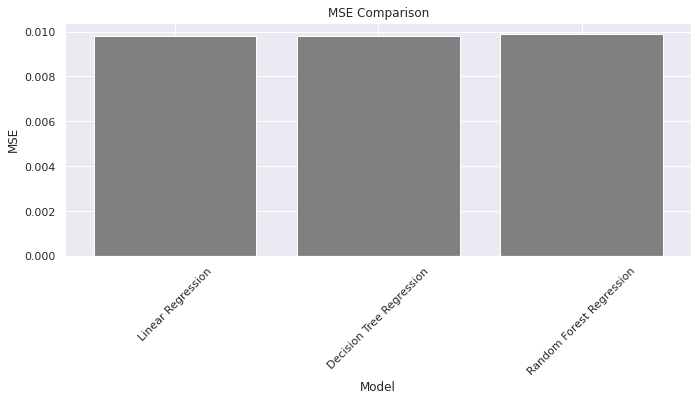

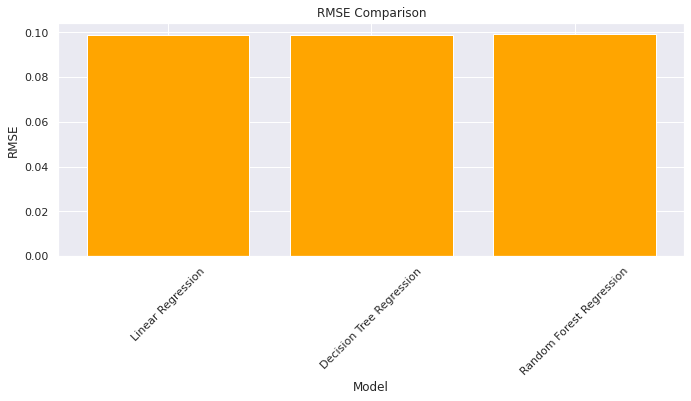

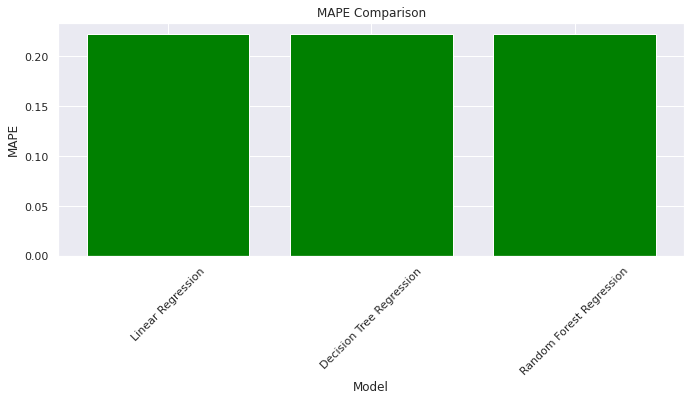

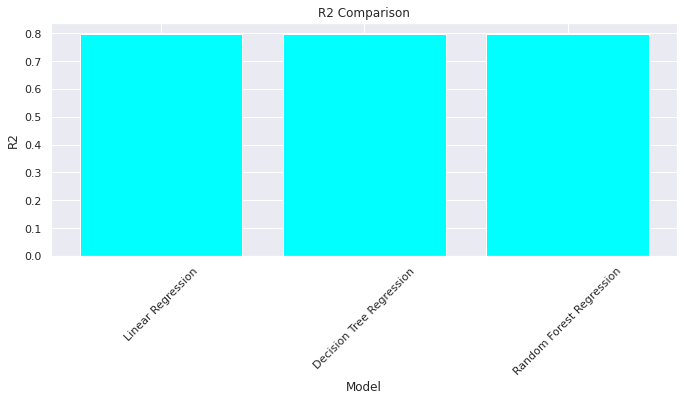

In [47]:
# Define the metrics and their corresponding colors
metrics = ['MSE', 'RMSE', 'MAPE', 'R2']
colors = ['grey', 'orange', 'green', 'cyan']

# Create separate bar plots for each metric
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 4))
    plt.bar(df['Model'], df[metric], color=colors[i])

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# Mutiple Variable Regression Models

# Linear Regression

Linear Regression

Model Evaluation
Average MSE: 0.0069
Average RMSE: 0.0832
Average MAPE: 0.2244
Average R2: 0.8563


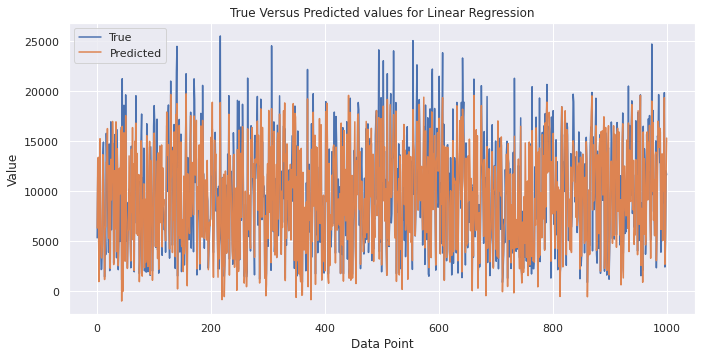

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have your purchase frequency and spending data stored in separate arrays
purchase_frequency = data[["purchase_frequency", "income", "age"]].values   # Your purchase frequency data
spending = data["spending"].values   # Your spending data

# Set the number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize an empty list to store the evaluation metric values for each fold
evaluation_metrics = []
true_values = []
predicted_values = []

# Initialize the scalers
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

print('=================')
print('Linear Regression')
print('=================')
print('')
# Iterate over the folds
for train_index, test_index in kf.split(purchase_frequency):

    # Split the data into training and test sets
    X_train, X_test = purchase_frequency[train_index], purchase_frequency[test_index]
    y_train, y_test = spending[train_index], spending[test_index]

    # Scale the training and test sets
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse scale the predicted values
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    # Append the true and predicted values to the lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the evaluation metric values to the list
    evaluation_metrics.append([mse, rmse, mape, r2])

# Calculate the average performance metrics across all folds
evaluation_metrics = np.array(evaluation_metrics)
average_metrics = np.mean(evaluation_metrics, axis=0)

print('=================')
print('Model Evaluation')
print('=================')
# Print the average metrics
print("Average MSE:", np.round(average_metrics[0],4))
print("Average RMSE:", np.round(average_metrics[1],4))
print("Average MAPE:", np.round(average_metrics[2],4))
print("Average R2:", np.round(average_metrics[3],4))

# Create a table to display the metrics
import pandas as pd

metrics_table = pd.DataFrame({'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
                              'Value': average_metrics})

# Plot true versus predicted values
plt.figure(figsize = (10,5))
plt.plot(true_values, label='True')
plt.plot(predicted_values, label='Predicted')
plt.title('True Versus Predicted values for Linear Regression')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()


# Decision Tree Regression

Decision Tree Regression

Model Evaluation
Average MSE: 0.0128
Average RMSE: 0.1128
Average MAPE: 0.2289
Average R2: 0.7368


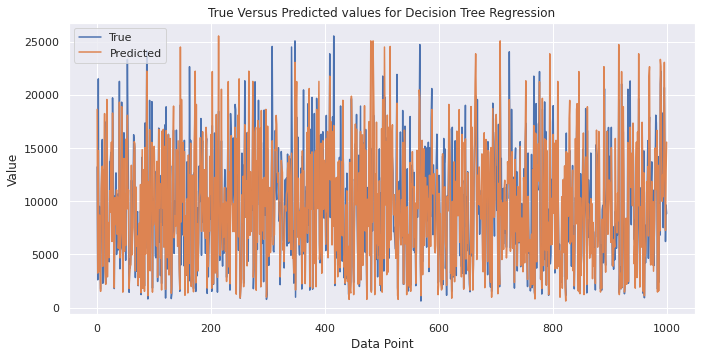

In [49]:
from sklearn.tree import DecisionTreeRegressor
# Assuming you have your purchase frequency and spending data stored in separate arrays
purchase_frequency = data[["purchase_frequency", "income", "age"]].values   # Your purchase frequency data
spending = data["spending"].values   # Your spending data

# Set the number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize an empty list to store the evaluation metric values for each fold
evaluation_metrics = []
true_values = []
predicted_values = []

# Initialize the scalers
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

print('========================')
print('Decision Tree Regression')
print('========================')
print('')
# Iterate over the folds
for train_index, test_index in kf.split(purchase_frequency):

    # Split the data into training and test sets
    X_train, X_test = purchase_frequency[train_index], purchase_frequency[test_index]
    y_train, y_test = spending[train_index], spending[test_index]

    # Scale the training and test sets
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Create a linear regression model
    model = DecisionTreeRegressor()

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse scale the predicted values
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Append the true and predicted values to the lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the evaluation metric values to the list
    evaluation_metrics.append([mse, rmse, mape, r2])

# Calculate the average performance metrics across all folds
evaluation_metrics = np.array(evaluation_metrics)
average_metrics = np.mean(evaluation_metrics, axis=0)

print('=================')
print('Model Evaluation')
print('=================')
# Print the average metrics
print("Average MSE:", np.round(average_metrics[0],4))
print("Average RMSE:", np.round(average_metrics[1],4))
print("Average MAPE:", np.round(average_metrics[2],4))
print("Average R2:", np.round(average_metrics[3],4))

# Create a table to display the metrics
import pandas as pd

metrics_table = pd.DataFrame({'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
                              'Value': average_metrics})

# Plot true versus predicted values
plt.figure(figsize = (10,5))
plt.plot(true_values, label='True')
plt.plot(predicted_values, label='Predicted')
plt.title('True Versus Predicted values for Decision Tree Regression')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()


# Random Forest Tree Regression

Random Forest Tree Regression

Model Evaluation
Average MSE: 0.0126
Average RMSE: 0.112
Average MAPE: 0.2302
Average R2: 0.7407


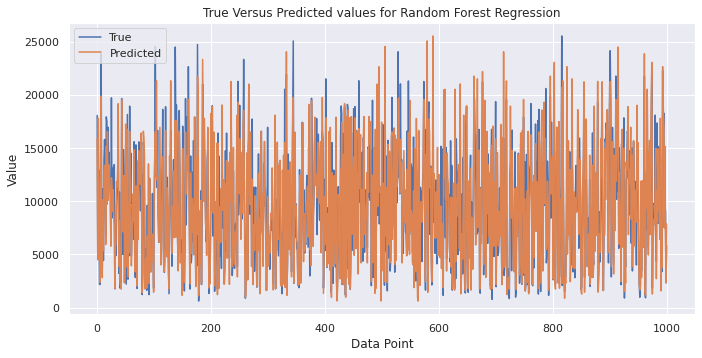

In [50]:
from sklearn.ensemble import RandomForestRegressor
# Assuming you have your purchase frequency and spending data stored in separate arrays
purchase_frequency = data[["purchase_frequency", "income", "age"]].values   # Your purchase frequency data
spending = data["spending"].values   # Your spending data

# Set the number of folds
k = 5

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Initialize an empty list to store the evaluation metric values for each fold
evaluation_metrics = []
true_values = []
predicted_values = []

# Initialize the scalers
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

print('=============================')
print('Random Forest Tree Regression')
print('=============================')
print('')
# Iterate over the folds
for train_index, test_index in kf.split(purchase_frequency):

    # Split the data into training and test sets
    X_train, X_test = purchase_frequency[train_index], purchase_frequency[test_index]
    y_train, y_test = spending[train_index], spending[test_index]

    # Scale the training and test sets
    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

    # Create a linear regression model
    model = DecisionTreeRegressor()

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)
    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test_scaled)

    # Inverse scale the predicted values
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Append the true and predicted values to the lists
    true_values.extend(y_test)
    predicted_values.extend(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the evaluation metric values to the list
    evaluation_metrics.append([mse, rmse, mape, r2])

# Calculate the average performance metrics across all folds
evaluation_metrics = np.array(evaluation_metrics)
average_metrics = np.mean(evaluation_metrics, axis=0)

print('=================')
print('Model Evaluation')
print('=================')
# Print the average metrics
print("Average MSE:", np.round(average_metrics[0],4))
print("Average RMSE:", np.round(average_metrics[1],4))
print("Average MAPE:", np.round(average_metrics[2],4))
print("Average R2:", np.round(average_metrics[3],4))

# Create a table to display the metrics
import pandas as pd

metrics_table = pd.DataFrame({'Metric': ['MSE', 'RMSE', 'MAPE', 'R2'],
                              'Value': average_metrics})

# Plot true versus predicted values
plt.figure(figsize = (10,5))
plt.plot(true_values, label='True')
plt.plot(predicted_values, label='Predicted')
plt.title('True Versus Predicted values for Random Forest Regression')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()


In [51]:
df = {
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'],
    'MSE': [0.0069, 0.0127, 0.0131],
    'RMSE': [0.0831, 0.1123, 0.1146],
    'MAPE': [0.2241, 0.2255, 0.2297],
    'R2': [0.8573, 0.739, 0.7303]
}

df = pd.DataFrame(df)
df

,Model,MSE,RMSE,MAPE,R2
0,Linear Regression,0.0069,0.0831,0.2241,0.8573
1,Decision Tree Regression,0.0127,0.1123,0.2255,0.7390
2,Random Forest Regression,0.0131,0.1146,0.2297,0.7303


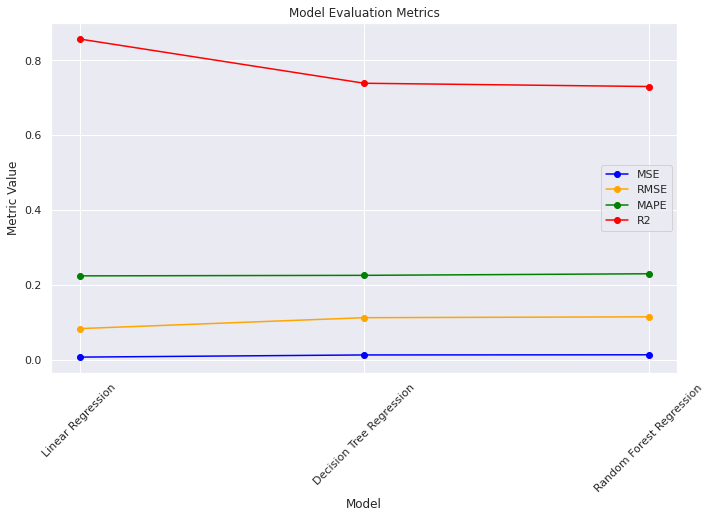

In [52]:
# Define the metrics and their corresponding colors
metrics = ['MSE', 'RMSE', 'MAPE', 'R2']
colors = ['blue', 'orange', 'green', 'red']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each metric for each model
for i, metric in enumerate(metrics):
    plt.plot(df['Model'], df[metric], marker='o', color=colors[i], label=metric)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

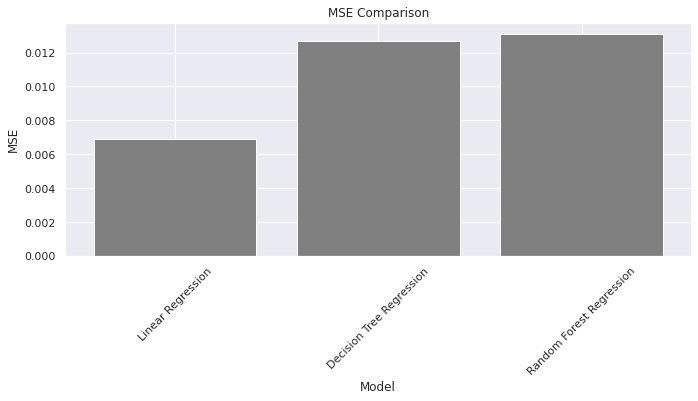

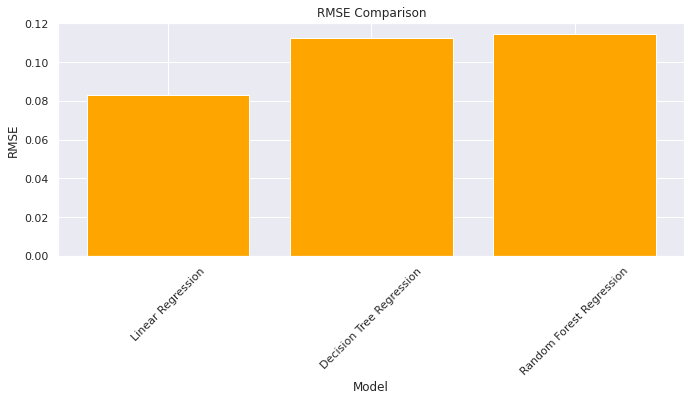

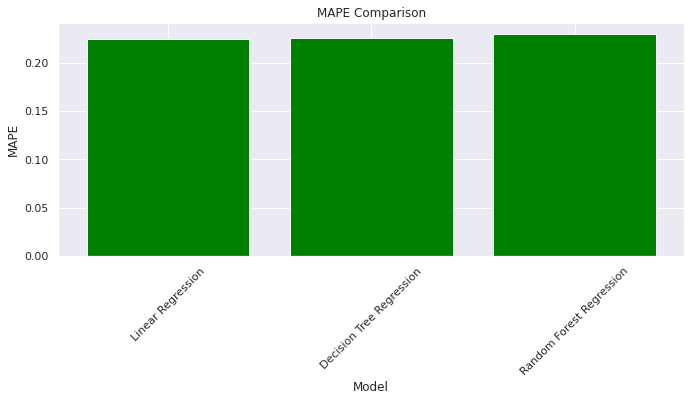

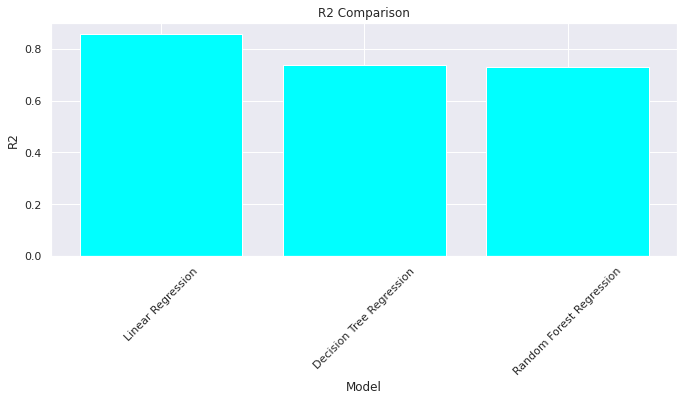

In [53]:
# Define the metrics and their corresponding colors
metrics = ['MSE', 'RMSE', 'MAPE', 'R2']
colors = ['grey', 'orange', 'green', 'cyan']

# Create separate bar plots for each metric
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 4))
    plt.bar(df['Model'], df[metric], color=colors[i])

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()